# "Only One Line Knows No Drift"

## – The Riemann Hypothesis as a Symmetry Theorem –

## ただ一つの線だけが揺らがぬ：対称性定理としてのリーマン予想

- OOL-KND-RHST


---

Please run it first.

Initialization: Jupyter Notebook Project
```python
# Initialize the Jupyter Notebook project
# Note: When running this script on Google Colab, please set GOOGLE_COLAB_MODE to True.
initialize_project()
```


---

## Initialize

In [8]:
# -- initialize.py --
# This script initializes the environment for the project.
# It sets up the necessary directories and files.
def initialize_project():
    """
    Initialize the project environment.
    """
    global GD_ZETA, GD_PATH, GOOGLE_COLAB_MODE
    # Note: When running this script on Google Colab, please set GOOGLE_COLAB_MODE to True.
    GOOGLE_COLAB_MODE = True  # <--- Set to True if running in Google Colab

    # import necessary libraries
    global np, plt, mcolors, zetazero, zeta, mp
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    from mpmath import zetazero, zeta, mp

    # configure
    mp.dps = 50  # Set decimal precision
    GD_ZETA = "ool-knd-rhst-zeta"  # <--- Please specify a directory name that is not in your My Drive.
    GD_PATH = "/content/drive/MyDrive/" + f"{GD_ZETA}/" if GOOGLE_COLAB_MODE else ""
    # check if running in Google Colab
    if GOOGLE_COLAB_MODE:
        try:
            from google.colab import drive
            drive.mount("/content/drive")
            # create directory if it doesn't exist
            import os
            if not os.path.exists(GD_PATH):
                os.makedirs(GD_PATH)
        except ImportError:
            print("Google Colab not detected, running in local mode.")
            pass
    else:
        print("Running in local mode.")

# Darken the colormap
def darken_cmap(cmap, factor=0.7):
    colors = cmap(np.linspace(0, 1, 256))
    darkened = colors[:, :3] * factor  # darken RGB channels
    darkened = np.clip(darkened, 0, 1)
    return mcolors.ListedColormap(
        np.hstack([darkened, colors[:, 3][:, None]])
    )  # add alpha channel

initialize_project()
# -- end of initialize.py --

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fig.2

- 2. Comparison of θ(t) = 2 arctan(Im/Re) and θ(t) = 2 arctan(Re/Im) across σ. Only Im/Re at σ = 0.5 aligns zeros

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Resolution: 3240 points
Calculating phase angle for \Im/\Re: σ = 0.10...
Calculating phase angle for \Im/\Re: σ = 0.20...
Calculating phase angle for \Im/\Re: σ = 0.30...
Calculating phase angle for \Im/\Re: σ = 0.40...
Calculating phase angle for \Im/\Re: σ = 0.50...
Calculating phase angle for \Im/\Re: σ = 0.60...
Calculating phase angle for \Im/\Re: σ = 0.70...
Calculating phase angle for \Im/\Re: σ = 0.80...
Calculating phase angle for \Im/\Re: σ = 0.90...
Calculating phase angle for \Re/\Im: σ = 0.10...
Calculating phase angle for \Re/\Im: σ = 0.20...
Calculating phase angle for \Re/\Im: σ = 0.30...
Calculating phase angle for \Re/\Im: σ = 0.40...
Calculating phase angle for \Re/\Im: σ = 0.50...
Calculating phase angle for \Re/\Im: σ = 0.60...
Calculating phase angle for \Re/\Im: σ = 0.70...
Calculating phase angle for \Re/\Im: σ = 0.80...
Calculating ph

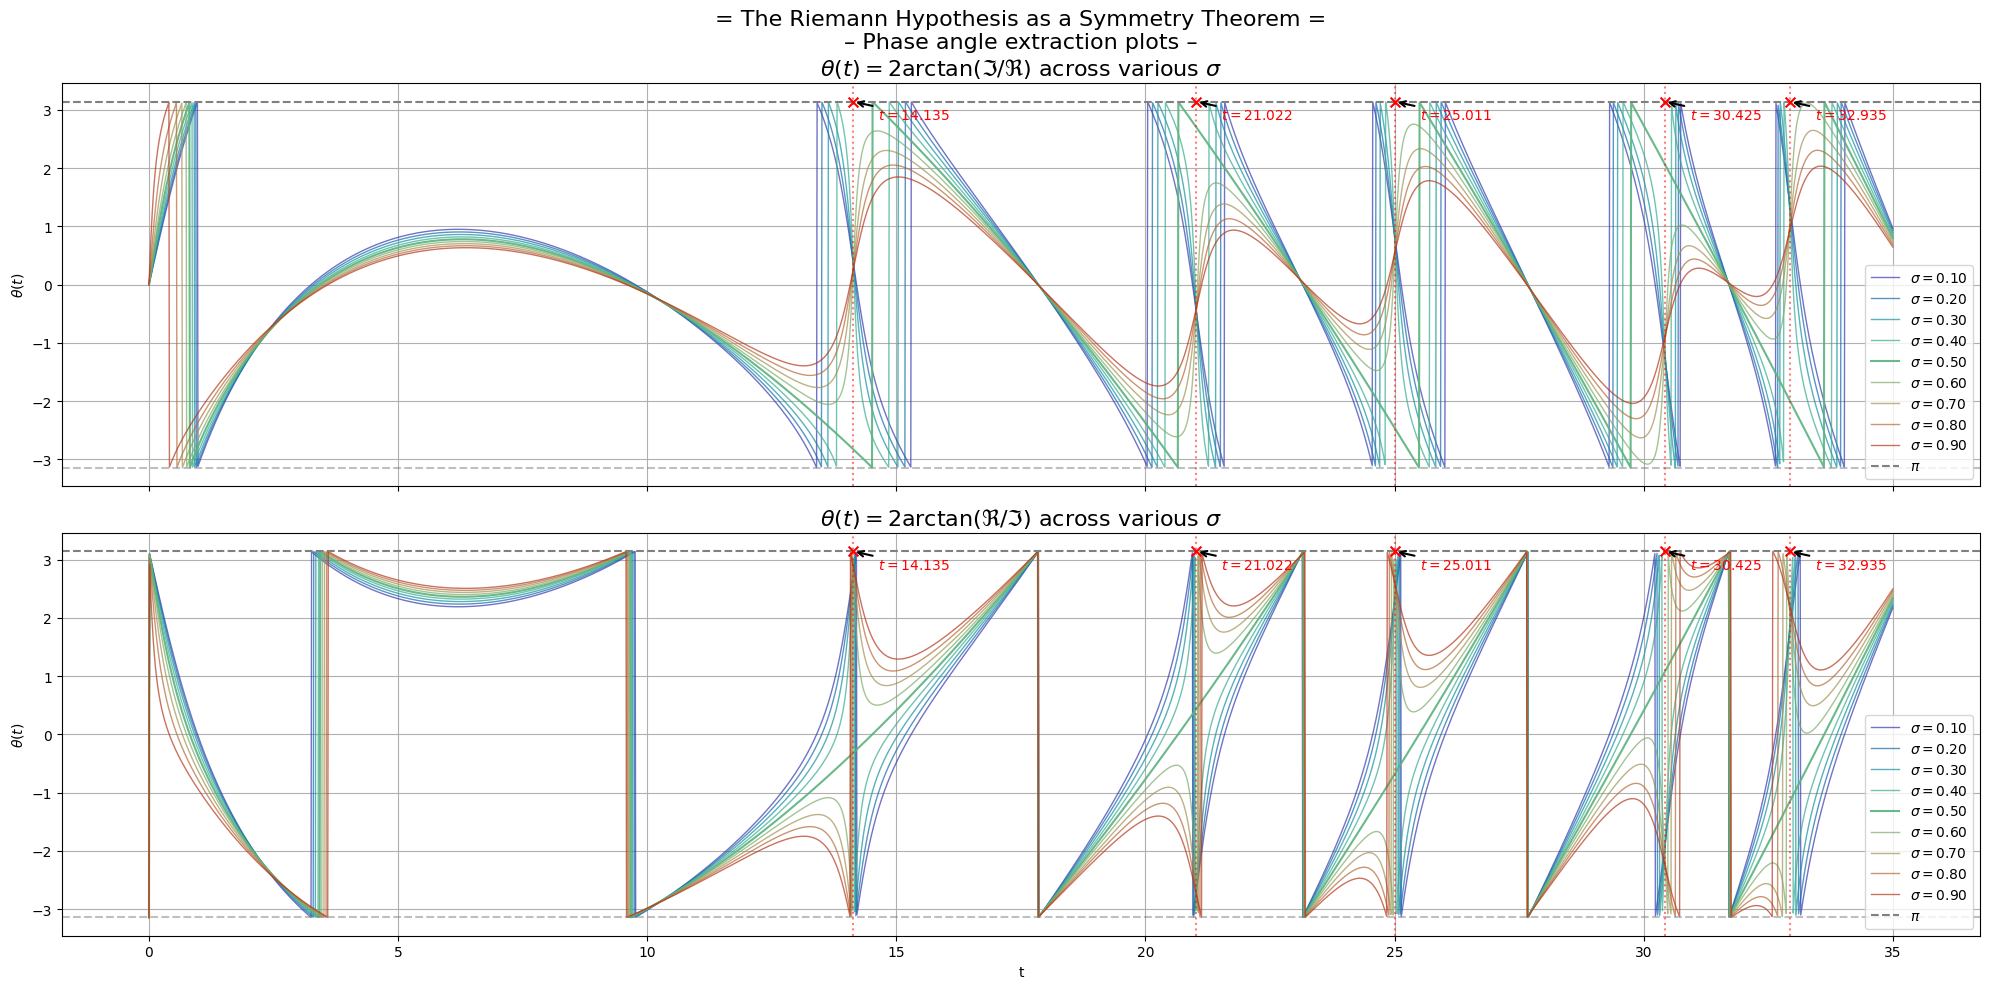

In [ ]:
# Visualization of non-trivial zeros of the zeta function through phase angle extraction plots
# Compare phase angles for multiple σ values (σ = 0.1 to 0.9) using Re/Im and Im/Re ratios
initialize_project()

# set parameters
T_MIN = 0
T_MAX = 35
T_RESO = int(np.log(T_MAX - T_MIN)) * 60 * 6 * 3
print(f"Resolution: {T_RESO} points")
S_MIN = 0.1
S_MAX = 0.9
S_STEP = 0.1
sigma_vals = np.arange(S_MIN, S_MAX + 0.1, S_STEP)
t_range = np.linspace(T_MIN, T_MAX, T_RESO)
zeros = [zetazero(n) for n in range(1, (T_MAX // 5) + 1)]

C_MAP = "rainbow"  # "Dark2"  # "tab10"
color_map = plt.get_cmap(C_MAP)


# Darken the colormap
def darken_cmap(cmap, factor=0.7):
    colors = cmap(np.linspace(0, 1, 256))
    darkened = colors[:, :3] * factor  # darken RGB channels
    darkened = np.clip(darkened, 0, 1)
    return mcolors.ListedColormap(
        np.hstack([darkened, colors[:, 3][:, None]])
    )  # add alpha channel


color_map = darken_cmap(color_map)

# Prepare graphs (stacked vertically in 2 rows)
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

for idx, ratio_type in enumerate([r"\Im/\Re", r"\Re/\Im"]):
    ax = axes[idx]
    for sigma in sigma_vals:
        # Calculate phase angle for each σ
        print(f"Calculating phase angle for {ratio_type}: σ = {sigma:.2f}...")
        theta_vals = []
        for t in t_range:
            s = complex(sigma, t)
            z = zeta(s)
            re = float(z.real)
            im = float(z.imag)
            im = im if im != 0 else 1e-10  # Avoid division by zero
            if ratio_type == r"\Re/\Im":
                ratio = re / im
            else:
                ratio = im / re
            theta = 2 * np.arctan(ratio)  # Core: Phase angle calculation
            theta_vals.append(theta)

        # plot settings (label, line width, alpha, color)
        label = rf"$\sigma = {sigma:.2f}$"
        alpha = 0.9 if abs(sigma - 0.5) < 0.025 else 0.7
        lw = 1.5 if abs(sigma - 0.5) < 0.025 else 1
        cm = color_map(sigma)
        # Plot the phase angle
        ax.plot(t_range, theta_vals, label=label, linewidth=lw, alpha=alpha, color=cm)

    # π line and zero point drawing
    ax.axhline(np.pi, color="gray", linestyle="--", label=r"$\pi$")
    ax.axhline(-np.pi, color="gray", linestyle="--", alpha=0.5)
    for zero in zeros:
        if T_MIN < zero.imag < T_MAX:
            ax.axvline(zero.imag, color="red", linestyle=":", alpha=0.5)
            ax.scatter(zero.imag, np.pi, color="red", s=50, zorder=5, marker="x")
            # Annotate the zero point
            anno_x = zero.imag + 0.5
            anno_y = np.pi - 0.3
            ax.annotate(
                f"$t={float(zero.imag):.3f}$",
                xy=(zero.imag, np.pi),
                xytext=(anno_x, anno_y),
                arrowprops=dict(arrowstyle="->", lw=1.5),
                fontsize=10,
                color="red",
            )
    # Set axis labels and title
    ax.set_ylabel(r"$\theta(t)$")
    ax.set_title(
        (
            "= The Riemann Hypothesis as a Symmetry Theorem =\n– Phase angle extraction plots –\n"
            if idx == 0
            else ""
        )
        + rf"$\theta(t) = 2\arctan({ratio_type})$ across various $\sigma$",
        fontsize=16,
        color="black",
    )
    ax.grid(True)
    ax.legend()

axes[1].set_xlabel("t")
plt.tight_layout()
plt.savefig(
    f"{GD_PATH}arctan_zeta_plot-v6-{C_MAP}-both-t={T_MIN}-{T_MAX}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

## Fig.3, 10, 13, A3, A4, A5, A6 (I/R)

- 3. Phase function θ(t) for σ ∈ {0.1, ..., 0.9}. Only σ = 0.5 shows near-linear trajectory.
- 10. Prime growth lines and zero-point waves. Coherent only at σ = 0.5.
- 13. Instability near σ = 0.5: even ±0.01 deviation causes significant drift.
- A3. Phase drift for σ ∈ {0.48, ..., 0.52} over t ∈ [0, 50]. σ = 0.5 is stable.
- A4. Drift over t ∈ [0, 100]. Off-critical lines diverge.
- A5, Drift intensifies with t for σ ≠ 0.5.
- A6. Full t ∈ [0, 500]. σ = 0.5 is only coherent trajectory.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
theta_sets.csv not found, recalculating...
Calculating for sigma = 0.005
Calculating for sigma = 0.25
Calculating for sigma = 0.499
Calculating for sigma = 0.5
Calculating for sigma = 0.501
Calculating for sigma = 0.75
Calculating for sigma = 0.095
theta_sets.csv saved successfully.: /content/drive/MyDrive/ool-knd-rhst-zeta/arctan_zeta_plot_ir_values.csv


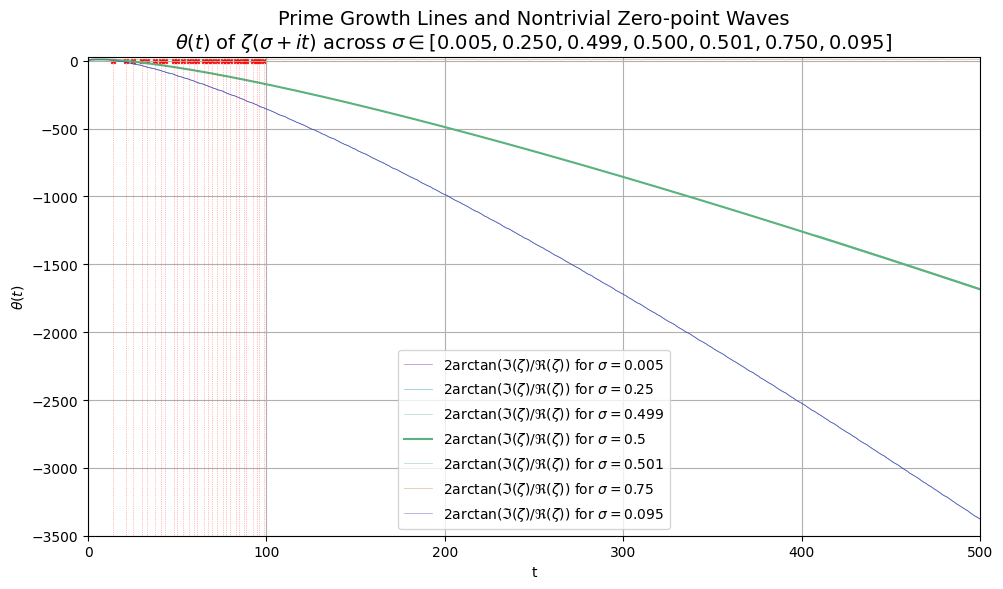

In [ ]:
# Drawing of prime number growth lines, extraction of prime number steps (down curve)
initialize_project()
import csv

TYPE = "ir"  # "ir" or "ri"
CSV_FILE = f"{GD_PATH}arctan_zeta_plot_{TYPE}_values.csv"

# set parameters
mp.dps = 50

T_MIN, T_MAX = 0, 500
T_RESO = int(np.log(T_MAX - T_MIN)) * 60 * 6 * 3

# sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# sigmas = [0.005, 0.25, 0.499, 0.5, 0.501, 0.75, 0.095]
sigmas = [0.499, 0.5, 0.501]
# sigmas = [0.3, 0.5, 0.7]
zeros = [zetazero(n) for n in range(1, 30)]
C_MAP = "rainbow"  # "Dark2"  # "tab10"
color_map = darken_cmap(plt.get_cmap(C_MAP))
theta_sets = []

try:
    raise FileNotFoundError  # Force recalculation
    with open(CSV_FILE, "r") as csvfile:
        # load theta_sets from CSV
        # t,theta(sigma=0.1),theta(sigma=0.2),theta(sigma=0.3),theta(sigma=0.4),theta(sigma=0.5),theta(sigma=0.6),theta(sigma=0.7),theta(sigma=0.8),theta(sigma=0.9)
        reader = csv.reader(csvfile)
        header = next(reader)
        t_vals = []
        for row in reader:
            t_vals.append(float(row[0]))
            theta_sets.append([float(value) for value in row[1:]])
        t_vals = np.array(t_vals)
        theta_sets = np.array(theta_sets).T  # transpose to match the original structure
    print("theta_sets.csv loaded successfully.")
except FileNotFoundError:
    print("theta_sets.csv not found, recalculating...")
    # calculate theta values
    for sigma in sigmas:
        print(f"Calculating for sigma = {sigma}")
        t_vals = np.linspace(T_MIN, T_MAX, T_RESO)

        theta_vals = []

        for t in t_vals:
            s = complex(sigma, t)
            z = zeta(s)
            re = float(z.real)
            im = float(z.imag)
            # Avoid division by zero
            # Calculate the ratio based on the specified type
            epsilon = 1e-12
            if TYPE == "ir":
                ratio = im / (re + epsilon * np.sign(re))
            else:
                ratio = re / (im + epsilon * np.sign(im))
            if TYPE == "ir" and re == 0.0 or TYPE == "ri" and im == 0.0:
                # Avoid division by zero
                theta_vals.append(np.pi)  # Assign π to avoid discontinuity
            else:
                theta_vals.append(2 * np.arctan(ratio) + np.pi)  # add π to avoid discontinuity
        theta_vals = np.unwrap(theta_vals)  # unwrap to avoid discontinuities
        theta_sets.append(theta_vals)

    # save theta_sets to CSV
    # t,theta(sigma=0.1),theta(sigma=0.2),theta(sigma=0.3),theta(sigma=0.4),theta(sigma=0.5),theta(sigma=0.6),theta(sigma=0.7),theta(sigma=0.8),theta(sigma=0.9)
    with open(CSV_FILE, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        header = ["t"] + [f"theta(sigma={sigma})" for sigma in sigmas]
        writer.writerow(header)
        for i in range(len(theta_sets[0])):
            row = [t_vals[i]] + [theta_set[i] for theta_set in theta_sets]
            writer.writerow(row)
    print(f"theta_sets.csv saved successfully.: {CSV_FILE}")

# plot settings
plt.figure(figsize=(10, 6))

for idx, (sigma, theta_vals) in enumerate(zip(sigmas, theta_sets)):
    linewidth = 1.5 if sigma == 0.5 else 0.5
    alpha = 1.0 if sigma == 0.5 else 0.5
    plt.plot(
        t_vals,
        theta_vals,
        linewidth=linewidth,
        alpha=alpha,
        label=r"$2 \arctan(\Im(\zeta)/\Re(\zeta))$ for $\sigma = " + str(sigma) + "$",
        color=color_map(sigma),
    )

# zero points
for zero in zeros:
    zero = float(zero.imag)
    plt.axvline(x=zero.real, color="red", linestyle=":", alpha=0.5, lw=0.5)
    plt.scatter(
        [zero],
        [0],
        color="red",
        marker="x",
        s=10,
    )

# plt.title(
#     "Prime Growth Lines and Nontrivial Zero-point Waves\n"
#     + r"$\theta(t)$ for $\zeta(\sigma + it), \sigma = "
#     + str(sigmas)
#     + "$"
# )

title_main = "Prime Growth Lines and Nontrivial Zero-point Waves"
title_sub = (
    r"$\theta(t)$ of $\zeta(\sigma + it)$ "
    + r"across $\sigma \in [" + ", ".join([f"{s:.3f}" for s in sigmas]) + "]$"
)
plt.title(title_main + "\n" + title_sub, fontsize=14)

plt.xlabel("t")
plt.ylabel(r"$\theta(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-500.png", dpi=300)
plt.xlim(0, 100)
plt.ylim(-200, 30)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-100.png", dpi=300)
plt.xlim(0, 50)
plt.ylim(-100, 30)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-050.png", dpi=300)
plt.xlim(0, 30)
plt.ylim(-20, 30)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-030.png", dpi=300)
# all view plot
plt.xlim(0, 500)
plt.ylim(-3500, 30)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-all-view.png", dpi=300)
plt.show()

## Fig.4

- 4. Phase angle growth curves across σ ∈ [0.1, 0.9]. Linear only for σ = 0.5.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
theta_sets.csv not found, recalculating...
Calculating for sigma = 0.1


<ipython-input-9-cde9c7165dbd>:57: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = re / (im + epsilon * np.sign(im))


Calculating for sigma = 0.2
Calculating for sigma = 0.3
Calculating for sigma = 0.4
Calculating for sigma = 0.5
Calculating for sigma = 0.6
Calculating for sigma = 0.7
Calculating for sigma = 0.8
Calculating for sigma = 0.9
theta_sets.csv saved successfully.: /content/drive/MyDrive/ool-knd-rhst-zeta/arctan_zeta_plot_ri_values.csv


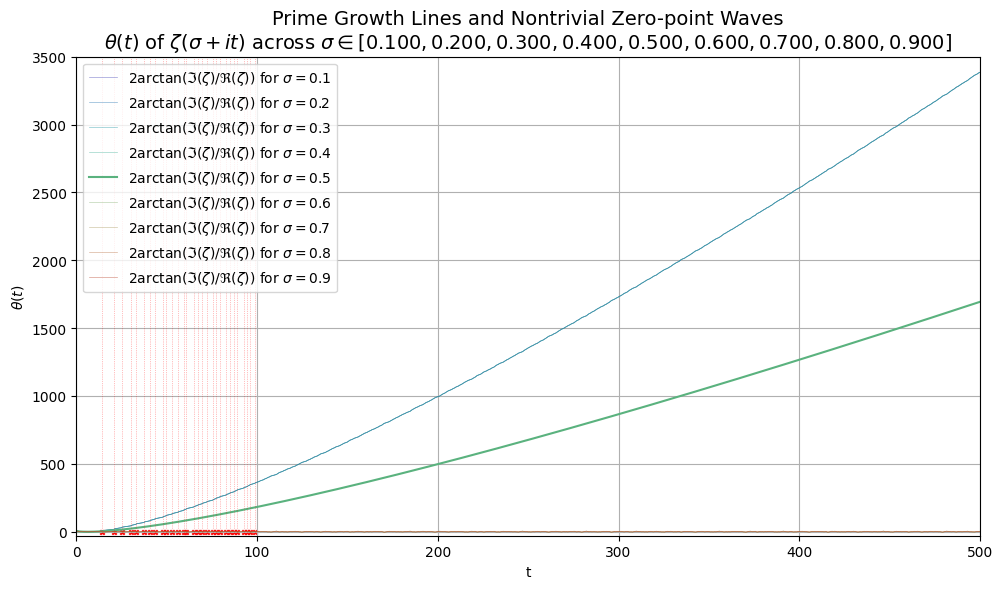

In [9]:
# Drawing of prime number growth lines, extraction of prime number steps (down curve)
initialize_project()
import csv

TYPE = "ri"  # "ir" or "ri"
CSV_FILE = f"{GD_PATH}arctan_zeta_plot_{TYPE}_values.csv"

# set parameters
mp.dps = 50

T_MIN, T_MAX = 0, 500
T_RESO = int(np.log(T_MAX - T_MIN)) * 60 * 6 * 3

sigmas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# sigmas = [0.005, 0.25, 0.499, 0.5, 0.501, 0.75, 0.095]
# sigmas = [0.499, 0.5, 0.501]
# sigmas = [0.3, 0.5, 0.7]
zeros = [zetazero(n) for n in range(1, 30)]
C_MAP = "rainbow"  # "Dark2"  # "tab10"
color_map = darken_cmap(plt.get_cmap(C_MAP))
theta_sets = []

try:
    raise FileNotFoundError  # Force recalculation
    with open(CSV_FILE, "r") as csvfile:
        # load theta_sets from CSV
        # t,theta(sigma=0.1),theta(sigma=0.2),theta(sigma=0.3),theta(sigma=0.4),theta(sigma=0.5),theta(sigma=0.6),theta(sigma=0.7),theta(sigma=0.8),theta(sigma=0.9)
        reader = csv.reader(csvfile)
        header = next(reader)
        t_vals = []
        for row in reader:
            t_vals.append(float(row[0]))
            theta_sets.append([float(value) for value in row[1:]])
        t_vals = np.array(t_vals)
        theta_sets = np.array(theta_sets).T  # transpose to match the original structure
    print("theta_sets.csv loaded successfully.")
except FileNotFoundError:
    print("theta_sets.csv not found, recalculating...")
    # calculate theta values
    for sigma in sigmas:
        print(f"Calculating for sigma = {sigma}")
        t_vals = np.linspace(T_MIN, T_MAX, T_RESO)

        theta_vals = []

        for t in t_vals:
            s = complex(sigma, t)
            z = zeta(s)
            re = float(z.real)
            im = float(z.imag)
            # Avoid division by zero
            # Calculate the ratio based on the specified type
            epsilon = 1e-12
            if TYPE == "ir":
                ratio = im / (re + epsilon * np.sign(re))
            else:
                ratio = re / (im + epsilon * np.sign(im))
            if TYPE == "ir" and re == 0.0 or TYPE == "ri" and im == 0.0:
                # Avoid division by zero
                theta_vals.append(np.pi)  # Assign π to avoid discontinuity
            else:
                theta_vals.append(2 * np.arctan(ratio) + np.pi)  # add π to avoid discontinuity
        theta_vals = np.unwrap(theta_vals)  # unwrap to avoid discontinuities
        theta_sets.append(theta_vals)

    # save theta_sets to CSV
    # t,theta(sigma=0.1),theta(sigma=0.2),theta(sigma=0.3),theta(sigma=0.4),theta(sigma=0.5),theta(sigma=0.6),theta(sigma=0.7),theta(sigma=0.8),theta(sigma=0.9)
    with open(CSV_FILE, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        header = ["t"] + [f"theta(sigma={sigma})" for sigma in sigmas]
        writer.writerow(header)
        for i in range(len(theta_sets[0])):
            row = [t_vals[i]] + [theta_set[i] for theta_set in theta_sets]
            writer.writerow(row)
    print(f"theta_sets.csv saved successfully.: {CSV_FILE}")

# plot settings
plt.figure(figsize=(10, 6))

for idx, (sigma, theta_vals) in enumerate(zip(sigmas, theta_sets)):
    linewidth = 1.5 if sigma == 0.5 else 0.5
    alpha = 1.0 if sigma == 0.5 else 0.5
    plt.plot(
        t_vals,
        theta_vals,
        linewidth=linewidth,
        alpha=alpha,
        label=r"$2 \arctan(\Im(\zeta)/\Re(\zeta))$ for $\sigma = " + str(sigma) + "$",
        color=color_map(sigma),
    )

# zero points
for zero in zeros:
    zero = float(zero.imag)
    plt.axvline(x=zero.real, color="red", linestyle=":", alpha=0.5, lw=0.5)
    plt.scatter(
        [zero],
        [0],
        color="red",
        marker="x",
        s=10,
    )

# plt.title(
#     "Prime Growth Lines and Nontrivial Zero-point Waves\n"
#     + r"$\theta(t)$ for $\zeta(\sigma + it), \sigma = "
#     + str(sigmas)
#     + "$"
# )

title_main = "Prime Growth Lines and Nontrivial Zero-point Waves"
title_sub = (
    r"$\theta(t)$ of $\zeta(\sigma + it)$ "
    + r"across $\sigma \in [" + ", ".join([f"{s:.3f}" for s in sigmas]) + "]$"
)
plt.title(title_main + "\n" + title_sub, fontsize=14)

plt.xlabel("t")
plt.ylabel(r"$\theta(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-500.png", dpi=300)
plt.xlim(0, 100)
plt.ylim(-30, 200)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-100.png", dpi=300)
plt.xlim(0, 50)
plt.ylim(-30, 100)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-050.png", dpi=300)
plt.xlim(0, 30)
plt.ylim(-30, 20)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-xlim=000-030.png", dpi=300)
# all view plot
plt.xlim(0, 500)
plt.ylim(-30, 3500)
plt.savefig(f"{GD_PATH}arctan_zeta_plot-v3-{TYPE}-sigmas-all-view.png", dpi=300)
plt.show()

## Fig.5

Zoom on drift near the 23rd zero for σ = 0.499, 0.5, 0.501. Only σ = 0.5 is stable.

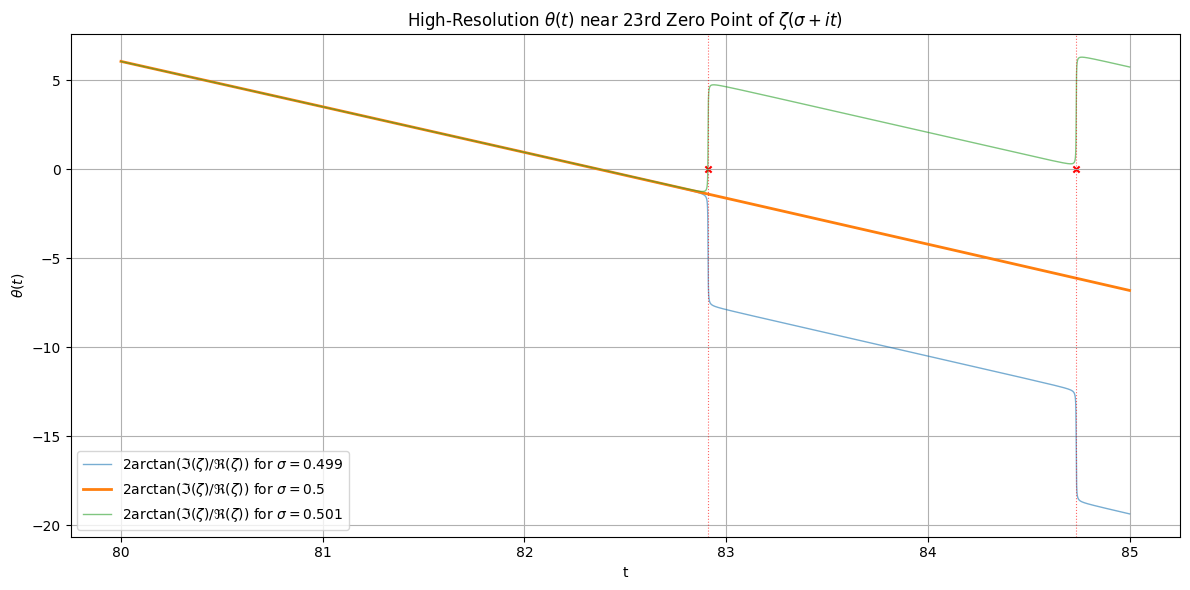

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import zetazero, zeta, mp

# 高精度演算のための設定
mp.dps = 50  # Decimal precision

# 分解能と対象範囲の設定（80〜85 のゼロ点付近）
T_MIN, T_MAX = 80, 85
T_RESO = 50000  # 極細分解能（必要に応じて上げる）

# 計算対象の sigma 値
sigmas = [0.499, 0.5, 0.501]
epsilon = 1e-12
TYPE = "ir"

# グラフデータ保存用
t_vals = np.linspace(T_MIN, T_MAX, T_RESO)
theta_sets = []

# θ 計算
for sigma in sigmas:
    theta_vals = []
    for t in t_vals:
        s = complex(sigma, t)
        z = zeta(s)
        re = float(z.real)
        im = float(z.imag)
        if TYPE == "ir":
            ratio = im / (re + epsilon * np.sign(re))
        else:
            ratio = re / (im + epsilon * np.sign(im))
        theta_vals.append(2 * np.arctan(ratio) + np.pi)
    theta_vals = np.unwrap(theta_vals)
    theta_sets.append(theta_vals)

# 零点データ（高精度）
zeros = [float(zetazero(n).imag) for n in range(1, 30) if T_MIN < float(zetazero(n).imag) < T_MAX]

# グラフ描画
plt.figure(figsize=(12, 6))
for idx, (sigma, theta_vals) in enumerate(zip(sigmas, theta_sets)):
    linewidth = 2.0 if sigma == 0.5 else 1.0
    alpha = 1.0 if sigma == 0.5 else 0.6
    label = rf"$2 \arctan(\Im(\zeta)/\Re(\zeta))$ for $\sigma={sigma}$"
    plt.plot(t_vals, theta_vals, label=label, linewidth=linewidth, alpha=alpha)

# ゼロ点表示（赤線と×印）
for zero in zeros:
    plt.axvline(x=zero, color="red", linestyle=":", alpha=0.6, lw=0.8)
    plt.scatter([zero], [0], color="red", marker="x", s=20)

plt.title(r"High-Resolution $\theta(t)$ near 23rd Zero Point of $\zeta(\sigma + it)$")
plt.xlabel("t")
plt.ylabel(r"$\theta(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("theta_near_23rd_zero_point.png", dpi=300)
plt.show()
# import ace_tools as tools; tools.display_dataframe_to_user(name="Zero Points (t ≈ 80-85)", dataframe={"Zero t": zeros})


## Fig. A2

Phase θ(t) = 2 arctan(Re / Im) near same region. Zero-alignment persists.

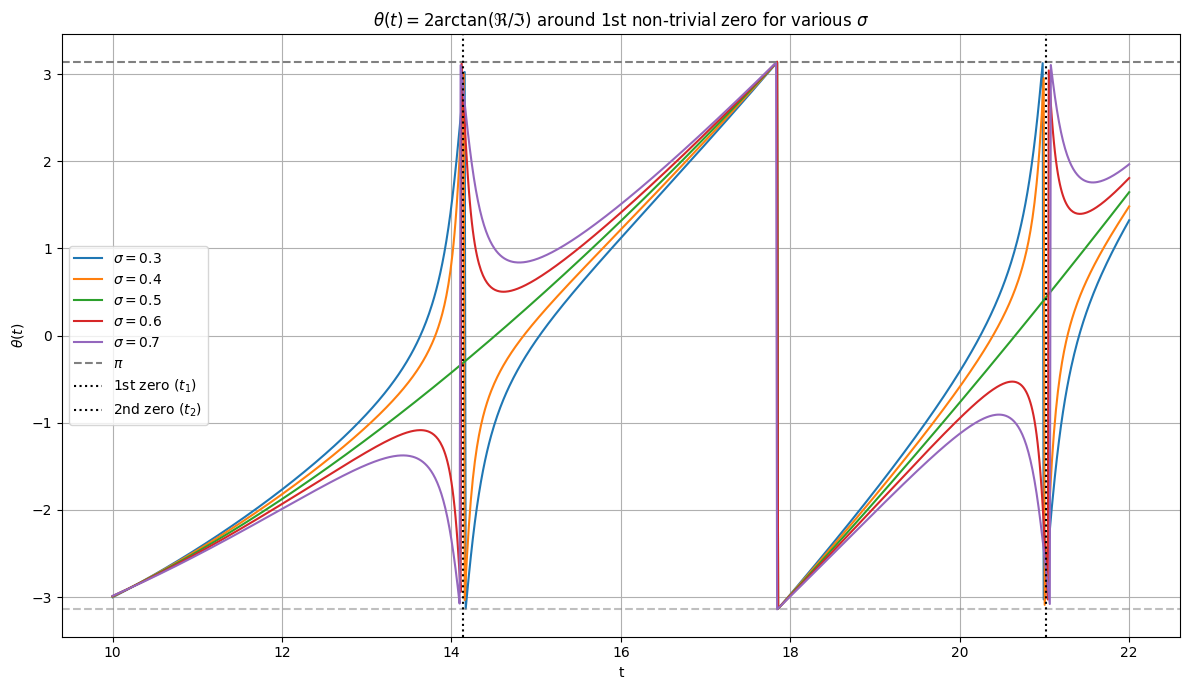

In [2]:
# 複数の σ 値で偏角を比較プロット（σ = 0.3 ～ 0.7） Re/Im の比
sigma_vals = [0.3, 0.4, 0.5, 0.6, 0.7]
t_range = np.linspace(10, 22, 1000)

plt.figure(figsize=(12, 7))

for sigma in sigma_vals:
    theta_vals = []
    for t in t_range:
        s = complex(sigma, t)
        z = zeta(s)
        re = float(z.real)
        im = float(z.imag)
        im += 0 if im > 0 else 1e-10
        # ゼロ除算を避けるために小さな値を加算
        # 角度の計算
        if re == 0:
            theta = np.pi
        else:
            theta = 2 * np.arctan(re / im)
        theta_vals.append(theta)

    label = rf"$\sigma = {sigma}$"
    plt.plot(t_range, theta_vals, label=label)

# ゼロ点付近の指標線
plt.axhline(np.pi, color="gray", linestyle="--", label=r"$\pi$")
plt.axhline(-np.pi, color="gray", linestyle="--", alpha=0.5)
plt.axvline(14.134725, color="black", linestyle=":", label="1st zero ($t_1$)")
plt.axvline(21.022040, color="black", linestyle=":", label="2nd zero ($t_2$)")
plt.xlabel("t")
plt.ylabel(r"$\theta(t)$")
plt.title(
    r"$\theta(t) = 2\arctan(\Re/\Im)$ around 1st non-trivial zero for various $\sigma$"
)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("arctan_zeta_plot-sigma-comparison-v1.png", dpi=300)
plt.show()

## Fig. 1, A1

- 1. Phase trajectories θ(t;σ) = 2 arctan(Im / Re) near the first nontrivial zeros. σ = 0.5 maintains symmetry.
- A1. Phase θ(t) = 2 arctan(Im / Re) near first zeros. σ = 0.5 cancels drift.

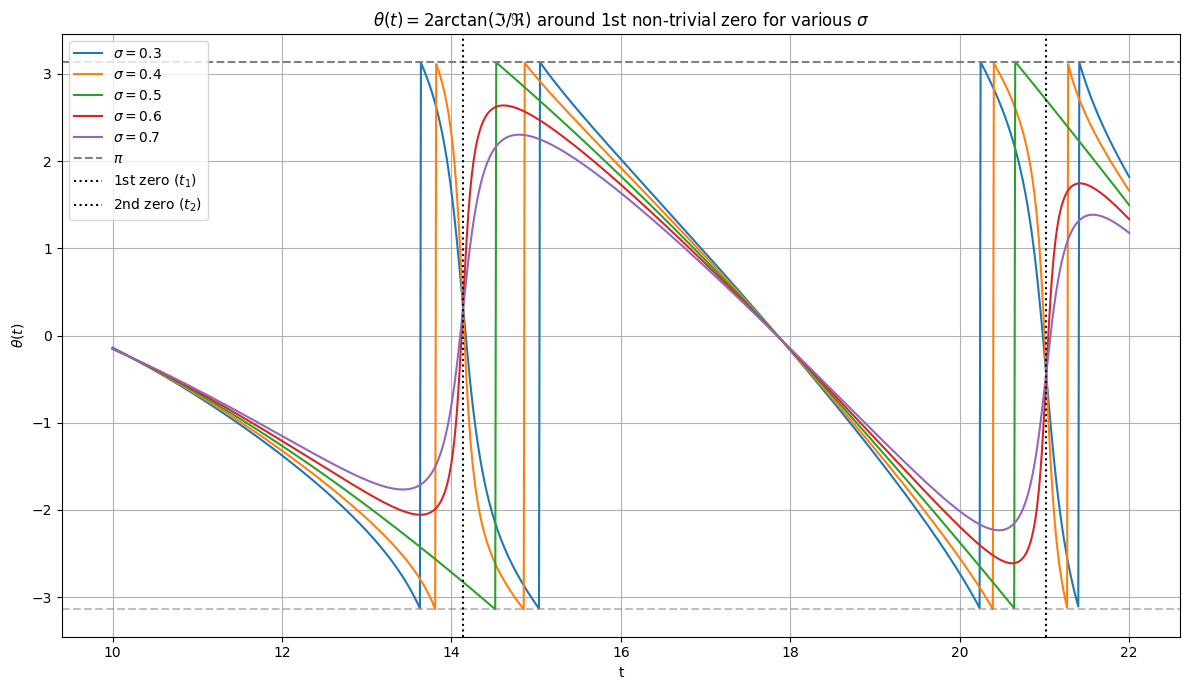

In [3]:
# 複数の σ 値で偏角を比較プロット（σ = 0.3 ～ 0.7） Im/Re の比
sigma_vals = [0.3, 0.4, 0.5, 0.6, 0.7]
t_range = np.linspace(10, 22, 1000)

plt.figure(figsize=(12, 7))

for sigma in sigma_vals:
    theta_vals = []
    for t in t_range:
        s = complex(sigma, t)
        z = zeta(s)
        re = float(z.real)
        im = float(z.imag)
        if re == 0:
            theta = np.pi
        else:
            theta = 2 * np.arctan(im / re)
        theta_vals.append(theta)

    label = rf"$\sigma = {sigma}$"
    plt.plot(t_range, theta_vals, label=label)

# ゼロ点付近の指標線
plt.axhline(np.pi, color="gray", linestyle="--", label=r"$\pi$")
plt.axhline(-np.pi, color="gray", linestyle="--", alpha=0.5)
plt.axvline(14.134725, color="black", linestyle=":", label="1st zero ($t_1$)")
plt.axvline(21.022040, color="black", linestyle=":", label="2nd zero ($t_2$)")
plt.xlabel("t")
plt.ylabel(r"$\theta(t)$")
plt.title(
    r"$\theta(t) = 2\arctan(\Im/\Re)$ around 1st non-trivial zero for various $\sigma$"
)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("arctan_zeta_plot-sigma-comparison-v0.png", dpi=300)
plt.show()

## Fig.11

- 11. Phase near nontrivial zeros: raw arg ζ, unwrapped θ(t), and θ'(t) show π-jumps.

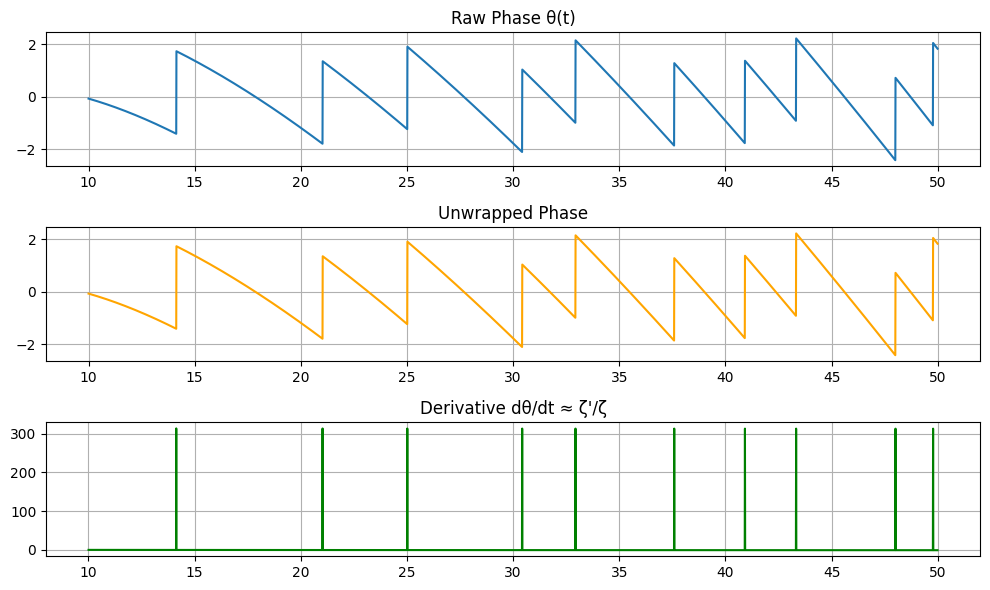

In [7]:
# Argument Principle + Jensen’s Formula and Hardy’s Z-Function Analysis
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp, zeta

# Precision setting
mp.dps = 50

# Analysis line: σ + it (fixed σ)
sigma = 0.5  # Re(s)
t_min = 10
t_max = 50
dt = 0.01
t_vals = np.arange(t_min, t_max, dt)

# Argument of ζ(s): θ(t) = arg(ζ(σ + it))
theta_vec = []
for t in t_vals:
    s = mp.mpc(sigma, t)
    z = zeta(s)
    theta = mp.arg(z)
    theta_vec.append(float(theta))

# Unwrap the phase (make ±π jumps continuous)
theta_unwrapped = np.unwrap(theta_vec)

# Derivative (numerical approximation): dθ/dt
dtheta_dt = np.diff(theta_unwrapped) / dt

# Integration (phase change as zero count): ∫ dθ/dt dt
theta_drift = np.cumsum(dtheta_dt) * dt

# Plotting (multiple options)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t_vals, theta_vec, label="arg ζ(s)")
plt.title("Raw Phase θ(t)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_vals, theta_unwrapped, label="Unwrapped arg ζ(s)", color='orange')
plt.title("Unwrapped Phase")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_vals[1:], dtheta_dt, label="dθ/dt", color='green')
plt.title("Derivative dθ/dt ≈ ζ'/ζ")
plt.grid()

plt.tight_layout()
# save figures
plt.savefig("o3-Type1+2-zeta_phase_analysis-v1.png", dpi=300)
plt.show()


## Figure List

In [10]:
import pandas as pd

# 論文に含まれる図とキャプションの一覧（抜粋・再構成済）
figures_data = [
    ("Figure 01", "Phase trajectories θ(t;σ) = 2 arctan(Im / Re) near the first nontrivial zeros. σ = 0.5 maintains symmetry."),
    ("Figure 02", "Comparison of θ(t) = 2 arctan(Im/Re) and θ(t) = 2 arctan(Re/Im) across σ. Only Im/Re at σ = 0.5 aligns zeros."),
    ("Figure 03", "Phase function θ(t) for σ ∈ {0.1, ..., 0.9}. Only σ = 0.5 shows near-linear trajectory."),
    ("Figure 04", "Phase angle growth curves across σ ∈ [0.1, 0.9]. Linear only for σ = 0.5."),
    ("Figure 05", "Zoom on drift near the 23rd zero for σ = 0.499, 0.5, 0.501. Only σ = 0.5 is stable."),
    ("Figure 06", "Zero count via θ'(t). dθ/dt spikes match known zeros, illustrating π-jump structure."),
    ("Figure 07", "Unwrapped θ(t) at σ = 1/2 shows zero drift in linear regression."),
    ("Figure 08", "Drift grows linearly with σ − 1/2. Empirical fit confirms proportionality."),
    ("Figure 09", "Phase curves θ(t;σ) over t ∈ [0, 500] for σ ∈ [0.1, ..., 0.9]. Only σ = 0.5 is linear."),
    ("Figure 10", "Prime growth lines and zero-point waves. Coherent only at σ = 0.5."),
    ("Figure 11", "Phase near nontrivial zeros: raw arg ζ, unwrapped θ(t), and θ'(t) show π-jumps."),
    ("Figure 12", "Phase derivative from Λ(n) up to n = 1000. Prime interference causes jumps."),
    ("Figure 13", "Instability near σ = 0.5: even ±0.01 deviation causes significant drift."),
    ("Figure A1", "Phase θ(t) = 2 arctan(Im / Re) near first zeros. σ = 0.5 cancels drift."),
    ("Figure A2", "Phase θ(t) = 2 arctan(Re / Im) near same region. Zero-alignment persists."),
    ("Figure A3", "Phase drift for σ ∈ {0.48, ..., 0.52} over t ∈ [0, 50]. σ = 0.5 is stable."),
    ("Figure A4", "Drift over t ∈ [0, 100]. Off-critical lines diverge."),
    ("Figure A5", "Drift intensifies with t for σ ≠ 0.5."),
    ("Figure A6", "Full t ∈ [0, 500]. σ = 0.5 is only coherent trajectory.")
]

df_figures_final = pd.DataFrame(figures_data, columns=["Figure", "Caption"])
df_figures_final = df_figures_final.sort_values("Figure").reset_index(drop=True)

df_figures_final


,Figure,Caption
0,Figure 01,Phase trajectories θ(t;σ) = 2 arctan(Im / Re) ...
1,Figure 02,Comparison of θ(t) = 2 arctan(Im/Re) and θ(t) ...
2,Figure 03,"Phase function θ(t) for σ ∈ {0.1, ..., 0.9}. O..."
3,Figure 04,"Phase angle growth curves across σ ∈ [0.1, 0.9..."
4,Figure 05,Zoom on drift near the 23rd zero for σ = 0.499...
5,Figure 06,Zero count via θ'(t). dθ/dt spikes match known...
6,Figure 07,Unwrapped θ(t) at σ = 1/2 shows zero drift in ...
7,Figure 08,Drift grows linearly with σ − 1/2. Empirical f...
8,Figure 09,"Phase curves θ(t;σ) over t ∈ [0, 500] for σ ∈ ..."
9,Figure 10,Prime growth lines and zero-point waves. Coher...
